In [3]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA

#Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
data=pd.read_excel('WineKMC.xlsx')
data.head()

C:\Anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [5]:
data=data.drop(['Offer #'],axis=1)
data.head(2)

,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,January,Malbec,72,56,France,False
1,January,Pinot Noir,72,17,France,False


<Axes: >

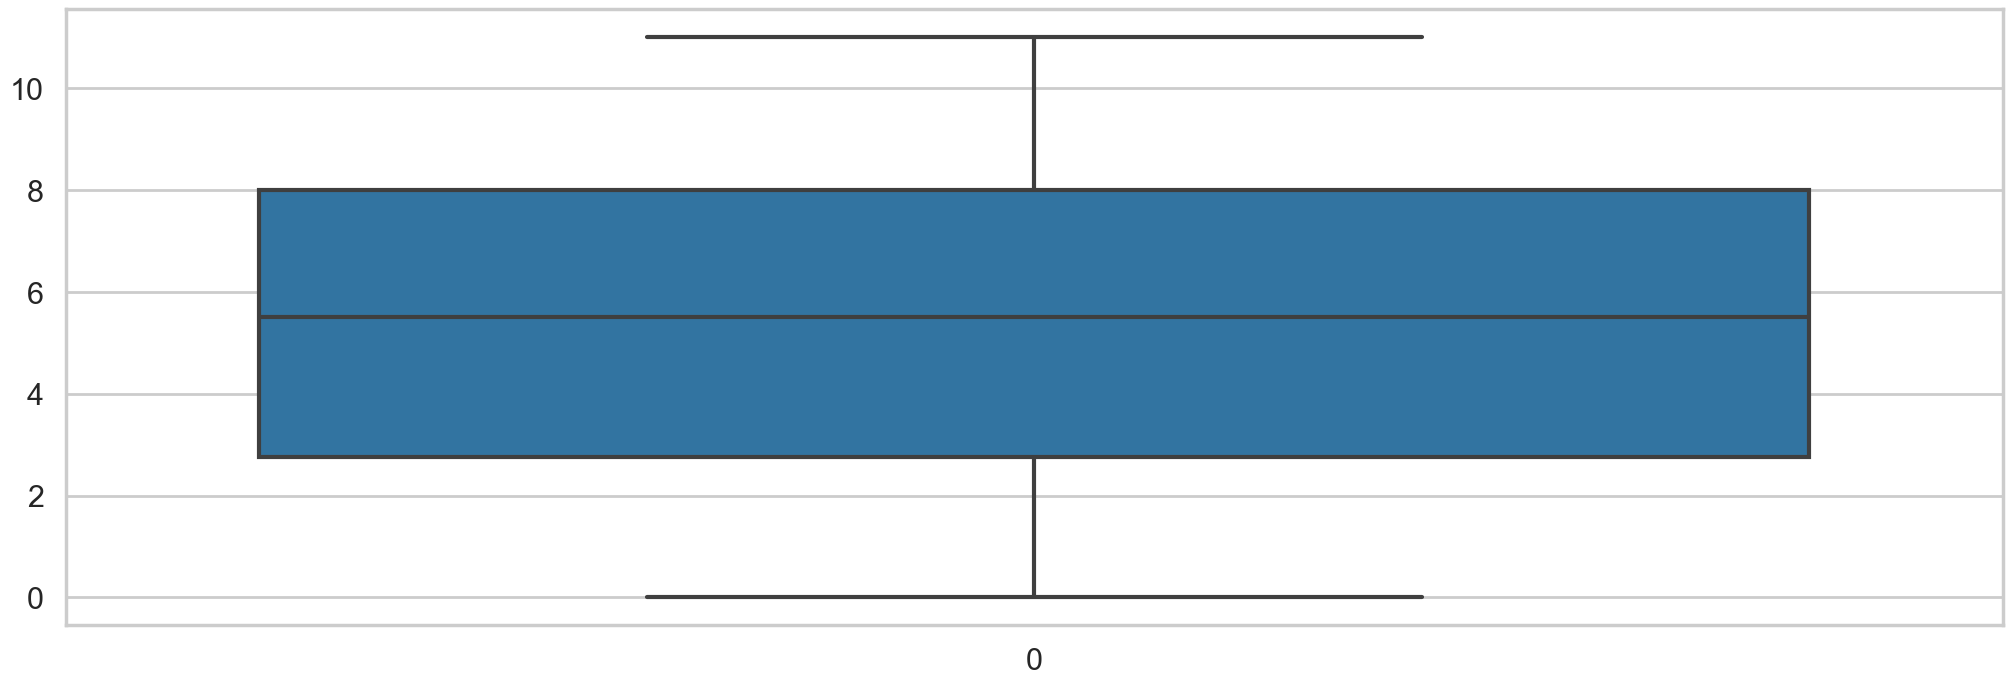

In [27]:
fig=plt.figure(figsize=(25,8))
sns.boxplot(data['Campaign'])

<Axes: ylabel='count'>

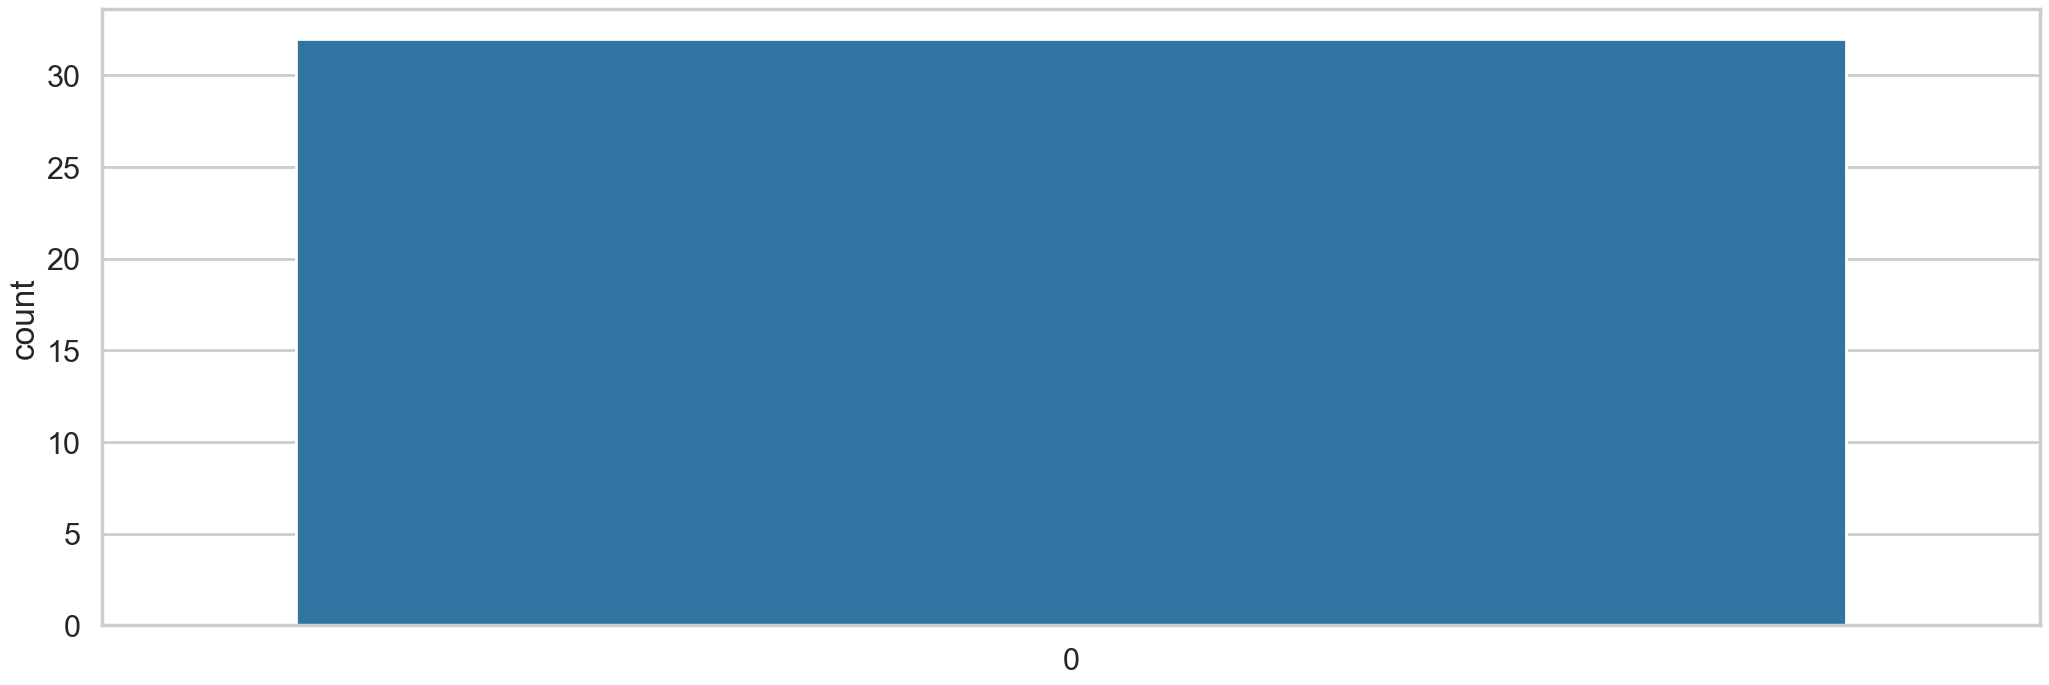

In [18]:
fig=plt.figure(figsize=(25,8))
sns.countplot(data['Varietal'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Campaign          32 non-null     object
 1   Varietal          32 non-null     object
 2   Minimum Qty (kg)  32 non-null     int64 
 3   Discount (%)      32 non-null     int64 
 4   Origin            32 non-null     object
 5   Past Peak         32 non-null     bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 1.4+ KB


In [12]:
data['Campaign']=data['Campaign'].astype('category')
data['Varietal']=data['Varietal'].astype('category')
data['Origin']=data['Origin'].astype('category')

In [13]:
data.dtypes

Campaign            category
Varietal            category
Minimum Qty (kg)       int64
Discount (%)           int64
Origin              category
Past Peak               bool
dtype: object

In [14]:
data.head()

,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,January,Malbec,72,56,France,False
1,January,Pinot Noir,72,17,France,False
2,February,Espumante,144,32,Oregon,True
3,February,Champagne,72,48,France,True
4,February,Cabernet Sauvignon,144,44,New Zealand,True


In [16]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
data['Campaign']=en.fit_transform(data['Campaign'])
data['Varietal']=en.fit_transform(data['Varietal'])
data['Origin']=en.fit_transform(data['Origin'])
data['Past Peak']=en.fit_transform(data['Past Peak'])
data.head()

,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,4,4,72,56,3,0
1,4,7,72,17,3,0
2,3,3,144,32,7,1
3,3,1,72,48,3,1
4,3,0,144,44,6,1


# Kmeans clustering

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, 'Error')

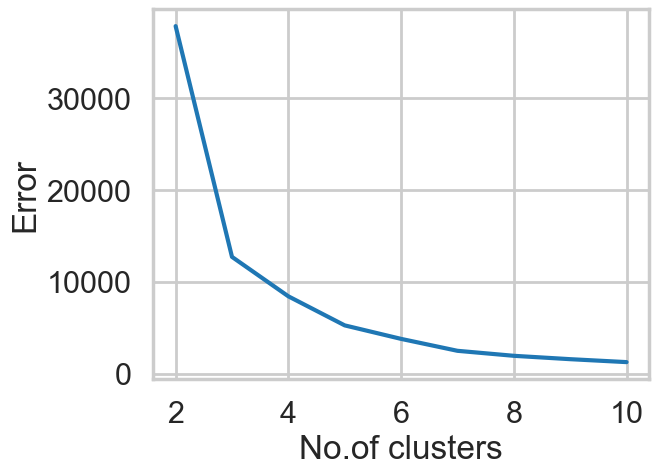

In [20]:
k=list(range(2,11))
y=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(data)
    labels=km.labels_
    y.append(km.inertia_)
plt.plot(k,y)
plt.xlabel('No.of clusters')
plt.ylabel('Error')

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'size')

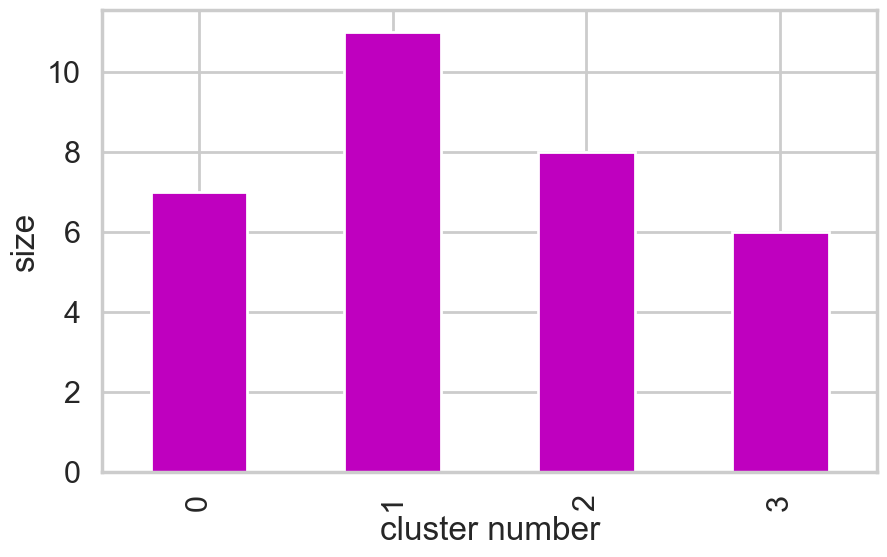

In [21]:
plt.figure(figsize=(10,6))
cluster=KMeans(n_clusters=4,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'size')

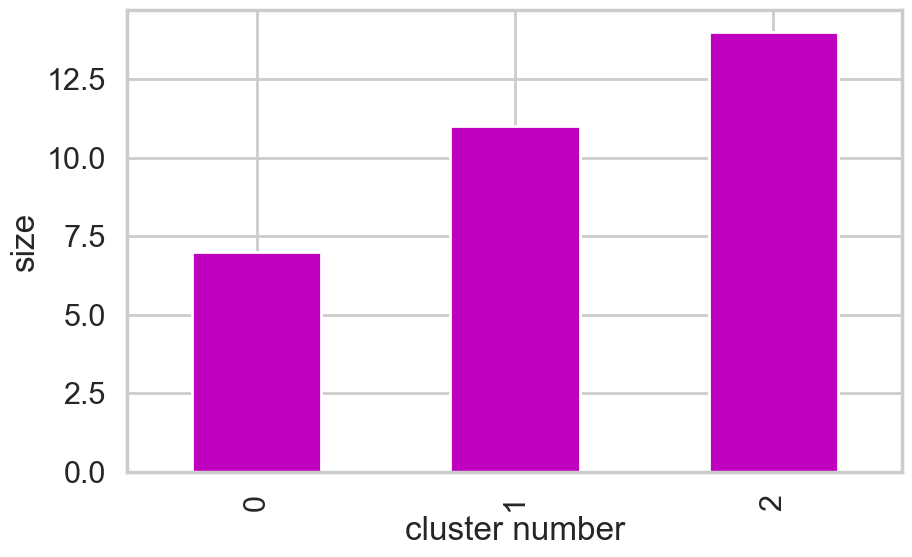

In [22]:
plt.figure(figsize=(10,6))
cluster=KMeans(n_clusters=3,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

[0.548065661182872, 0.6588405523772967, 0.6338642985763958, 0.6250534811129629, 0.5824883318322704, 0.6005814540449219, 0.5291693180860231, 0.45921806840116297, 0.4003795819895942]


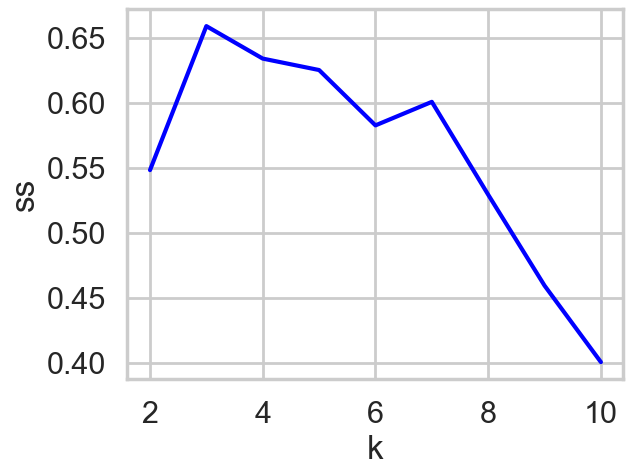

In [23]:
k=list(range(2,11))
ys=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=2)
    km.fit(data)
    labels=km.labels_
    ys.append(silhouette_score(data,labels))
    
plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('ss')
print(ys)

# Affinity Propagation

In [24]:
AP=AffinityPropagation()
AP.fit(data)

AffinityPropagation()

Text(0, 0.5, 'size')

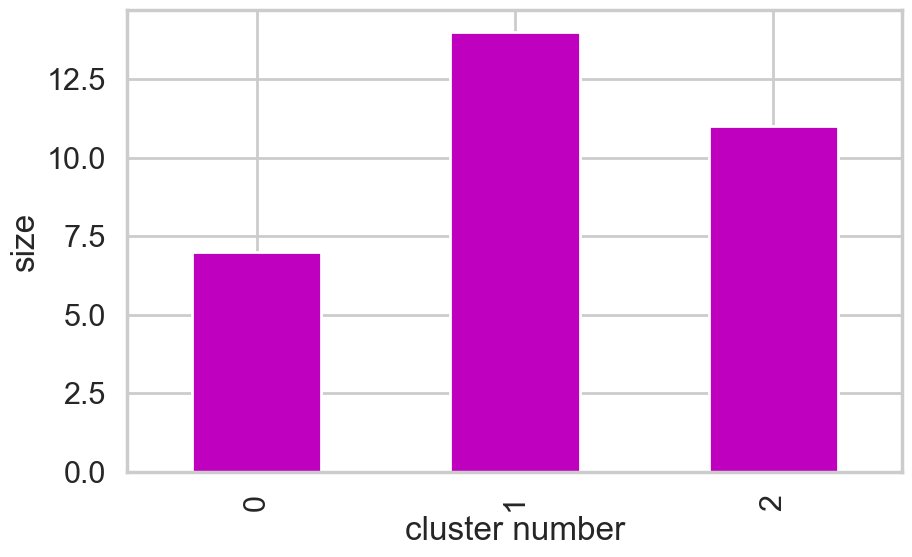

In [25]:
plt.figure(figsize=(10,6))
cluster=AP.fit(data)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')